In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MSFT_1986-03-13_2025-04-06.csv to MSFT_1986-03-13_2025-04-06.csv


In [3]:
df = pd.read_csv('MSFT_1986-03-13_2025-04-06.csv')

In [4]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1986-03-13 00:00:00-05:00,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14 00:00:00-05:00,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17 00:00:00-05:00,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18 00:00:00-05:00,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19 00:00:00-05:00,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


In [5]:
df['date'] = pd.to_datetime(df['date'], utc=True).dt.tz_convert(None)

df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df.head()

,date,open,high,low,close,adj_close,volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059707,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061839,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.062906,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061306,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060240,47894400


In [8]:
df['date'] = pd.to_datetime(df['date'])

df_filtered = df[(df['date'] >= '2023-12-31') & (df['date'] <= '2024-12-31')]

df_filtered.head()

,date,open,high,low,close,adj_close,volume
9527,2024-01-02,373.859985,375.899994,366.769989,370.869995,367.380615,25258600
9528,2024-01-03,369.010010,373.260010,368.510010,370.600006,367.113159,23083500
9529,2024-01-04,370.670013,373.100006,367.170013,367.940002,364.478149,20901500
9530,2024-01-05,368.970001,372.059998,366.500000,367.750000,364.289948,20987000
9531,2024-01-08,369.299988,375.200012,369.010010,374.690002,371.164673,23134000


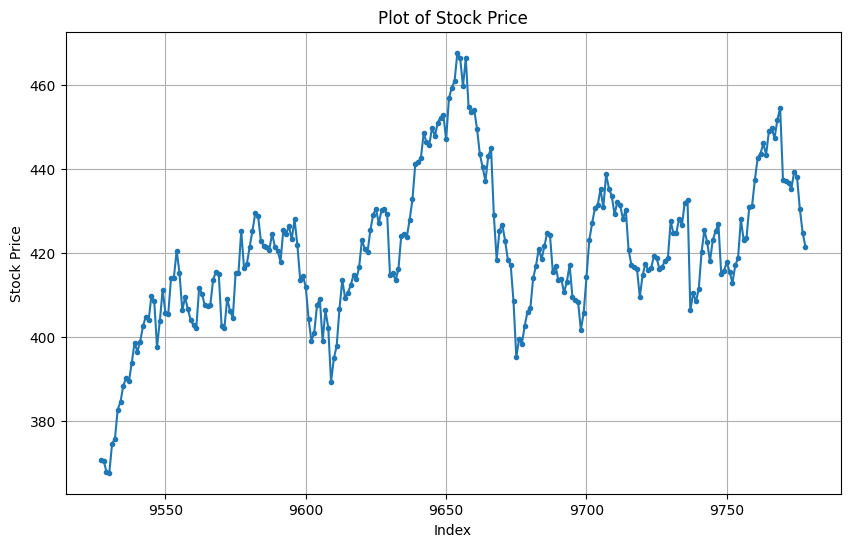

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['close'], marker='.', linestyle='-')
plt.title('Plot of Stock Price')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [20]:
# Calculate the difference between consecutive close prices
df_filtered['Price Change'] = df_filtered['close'].diff()

# Function to classify the states based on price change
def classify_state(price_change):
    if price_change > 0:  # Price is going up
        if price_change > df_filtered['Price Change'].median():  # High increase
            return 1  # State 1: Going Up High
        else:  # Low increase
            return 2  # State 2: Going Up Low
    elif price_change < 0:  # Price is going down
        if price_change < df_filtered['Price Change'].median():  # High decrease
            return 4  # State 4: Going Down High
        else:  # Low decrease
            return 3  # State 3: Going Down Low
    return 0  # If no change

# Apply the classification to each row
df_filtered['State'] = df_filtered['Price Change'].apply(classify_state)

# Show The Data With Additional Status
df_filtered[['date', 'close', 'price_change', 'state']].head()

<ipython-input-20-abd083e1cc24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price Change'] = df_filtered['close'].diff()
<ipython-input-20-abd083e1cc24>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['Price Change'].apply(classify_state)


,date,close,price_change,state
9527,2024-01-02,370.869995,NaN,Going Down Low
9528,2024-01-03,370.600006,-0.072799,Going Down Low
9529,2024-01-04,367.940002,-0.717756,Going Down Low
9530,2024-01-05,367.750000,-0.051640,Going Down Low
9531,2024-01-08,374.690002,1.887152,Going Up Low


In [30]:
# Creating Transition Table
states = ['Going Up High', 'Going Up Low', 'Going Down Low', 'Going Down High']
transition_matrix = pd.DataFrame(0, index=states, columns=states)

# Counting Frequency of Transition
for i in range(1, len(df_filtered)):
    current_state = df_filtered.iloc[i-1]['state']
    next_state = df_filtered.iloc[i]['state']
    transition_matrix.loc[current_state, next_state] += 1

# Counting Probability of Transition
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print(transition_matrix)

                 Going Up High  Going Up Low  Going Down Low  Going Down High
Going Up High         0.090909      0.454545        0.363636         0.090909
Going Up Low          0.040323      0.524194        0.379032         0.056452
Going Down Low        0.050505      0.434343        0.444444         0.070707
Going Down High       0.000000      0.647059        0.235294         0.117647


In [32]:
# Counting Initial State Probability
initial_state_prob = df_filtered['state'].value_counts(normalize=True)
print(initial_state_prob)

state
Going Up Low       0.492063
Going Down Low     0.396825
Going Down High    0.067460
Going Up High      0.043651
Name: proportion, dtype: float64


In [44]:
P = np.array([
    [0.090909, 0.454545, 0.363636, 0.090909],
    [0.040323, 0.524194, 0.379032, 0.056452],
    [0.050505, 0.434343, 0.444444, 0.070707],
    [0.000000, 0.647059, 0.235294, 0.117647]
])

# Initial state probabilities
initial_state_prob = {
    "Going Up Low": 0.492063,
    "Going Down Low": 0.396825,
    "Going Down High": 0.067460,
    "Going Up High": 0.043651
}

# Convert to B1
B_1 = np.array([
    initial_state_prob["Going Up High"],
    initial_state_prob["Going Up Low"],
    initial_state_prob["Going Down Low"],
    initial_state_prob["Going Down High"]
])

# Define convergence tolerance and maximum iterations
tolerance = 1e-6  # The threshold below which we consider the system stable
max_iterations = 1000  # Set a limit on the number of iterations to avoid infinite loops
iteration = 0

# Initialize previous state vector
B_prev = B_1
converged = False

# Iterate until convergence
while not converged and iteration < max_iterations:
    B_new = np.dot(B_prev, P)  # Multiply previous state by transition matrix
    # Check if the difference is below the tolerance
    if np.all(np.abs(B_new - B_prev) < tolerance):
        converged = True
    B_prev = B_new
    iteration += 1

# Display the final steady state vector, rounded to 2 decimal places
B_final = np.round(B_new, 2)
print(f"Steady State Vector (After {iteration} iterations, rounded to 2 decimal places):")
print(B_final)

Steady State Vector (After 4 iterations, rounded to 2 decimal places):
[0.04 0.49 0.39 0.07]


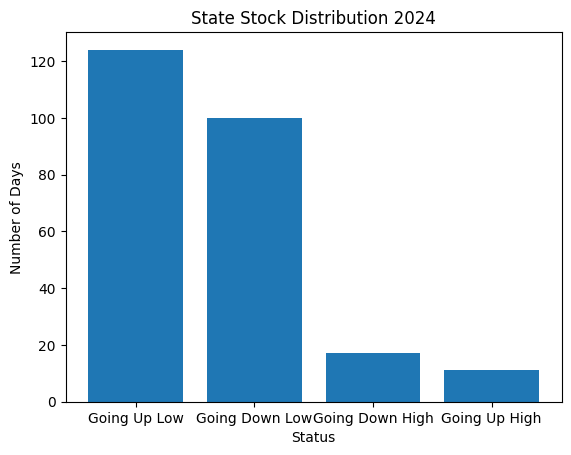

In [50]:
plt.bar(df_filtered['state'].value_counts().index, df_filtered['state'].value_counts().values)
plt.title('State Stock Distribution 2024')
plt.xlabel('Status')
plt.ylabel('Number of Days')
plt.show()